# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kayyerkan
Processing Record 2 of Set 1 | darwin
Processing Record 3 of Set 1 | vilyuchinsk
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | mitsamiouli
Processing Record 7 of Set 1 | margate
Processing Record 8 of Set 1 | lampazos de naranjo
Processing Record 9 of Set 1 | iqaluit
Processing Record 10 of Set 1 | gambela
Processing Record 11 of Set 1 | ad dabbah
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | papatowai
Processing Record 15 of Set 1 | saguenay
Processing Record 16 of Set 1 | urengoy
Processing Record 17 of Set 1 | miri
Processing Record 18 of Set 1 | puerto natales
Processing Record 19 of Set 1 | medicine hat
Processing Record 20 of Set 1 | piquete
Processing Record 21 of Set 1 | georgetown
Processing Record 22 of Set 1 | vila franca do cam

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

In [5]:
# Show Record Count
city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kayyerkan,69.3786,87.7439,13.39,63,0,7.11,RU,1722744291
1,darwin,-12.4611,130.8418,31.14,42,0,3.60,AU,1722744014
2,vilyuchinsk,52.9306,158.4028,21.15,79,100,4.26,RU,1722744291
3,adamstown,-25.0660,-130.1015,21.22,72,100,6.38,PN,1722744292
4,port-aux-francais,-49.3500,70.2167,2.64,87,86,7.51,TF,1722744292


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kayyerkan,69.3786,87.7439,13.39,63,0,7.11,RU,1722744291
1,darwin,-12.4611,130.8418,31.14,42,0,3.60,AU,1722744014
2,vilyuchinsk,52.9306,158.4028,21.15,79,100,4.26,RU,1722744291
3,adamstown,-25.0660,-130.1015,21.22,72,100,6.38,PN,1722744292
4,port-aux-francais,-49.3500,70.2167,2.64,87,86,7.51,TF,1722744292


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

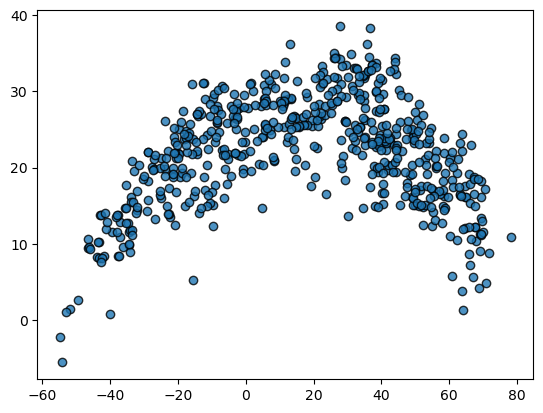

In [9]:
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

#### Latitude Vs. Humidity

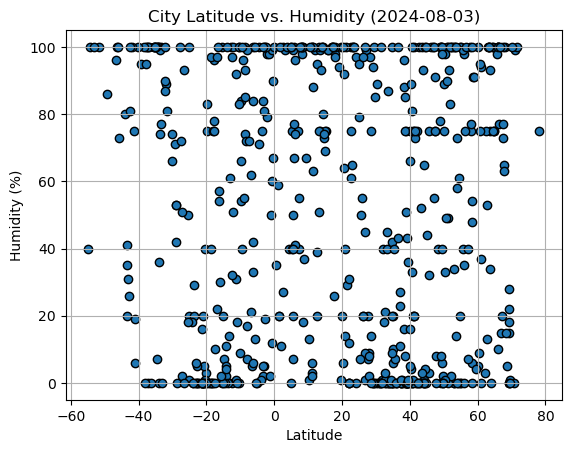

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], edgecolors="black",
label="Cities"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

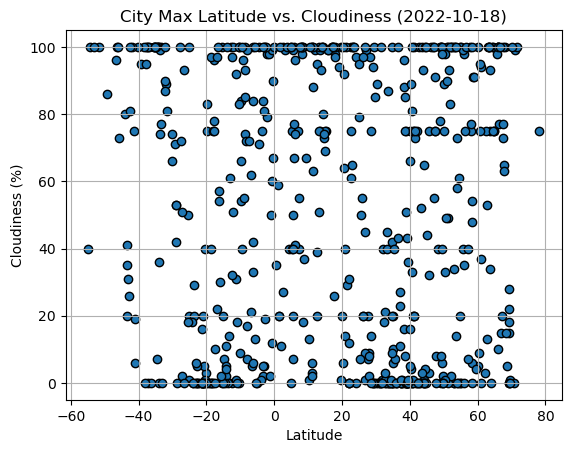

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], edgecolors="black",
label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

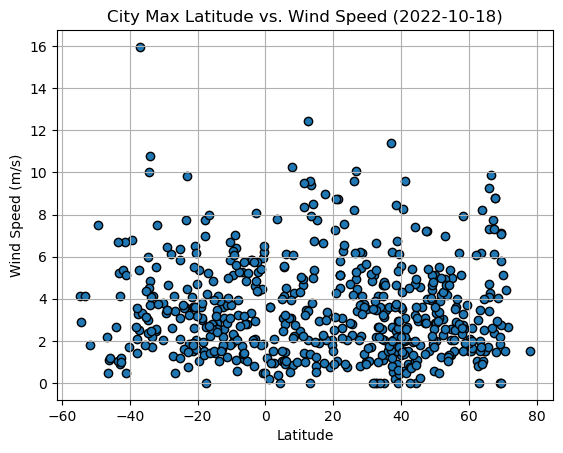

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], edgecolors="black",
label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, output_path):
    #Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept

    #Create line equation
    line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

    #Create scatter plot
    plt.scatter(x_values, y_values, edgecolors="black", facecolors="SteelBlue", alpha=0.75)

    #Plot regression line
    plt.plot(x_values, regress_values, "r-")

    #Annotate the line equation on the plot
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")

    #Label plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)

   #Print R-squared value
    print(f"The r-value is: {rvalue**2:.16f}")

    #Show plot
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kayyerkan,69.3786,87.7439,13.39,63,0,7.11,RU,1722744291
2,vilyuchinsk,52.9306,158.4028,21.15,79,100,4.26,RU,1722744291
6,margate,51.3813,1.3862,17.05,74,100,3.88,GB,1722744292
7,lampazos de naranjo,27.0167,-100.5167,31.78,38,99,3.42,MX,1722744292
8,iqaluit,63.7506,-68.5145,3.85,86,75,6.17,CA,1722744292


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,darwin,-12.4611,130.8418,31.14,42,0,3.60,AU,1722744014
3,adamstown,-25.0660,-130.1015,21.22,72,100,6.38,PN,1722744292
4,port-aux-francais,-49.3500,70.2167,2.64,87,86,7.51,TF,1722744292
5,mitsamiouli,-11.3847,43.2844,24.29,66,31,3.68,KM,1722744292
11,blackmans bay,-43.0167,147.3167,13.74,58,31,0.89,AU,1722744293


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.3753028773336627


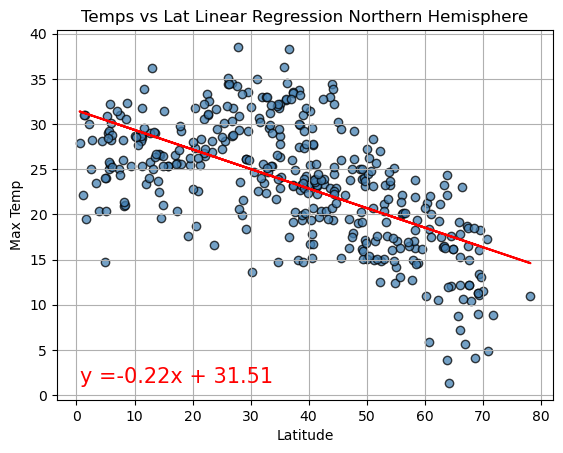

In [16]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Temps vs Lat Linear Regression Northern Hemisphere", "Latitude", "Max Temp", "../output_data/Northern_Hemisphere_MaxTemp_regression1.png")

The r-value is: 0.6043444211687478


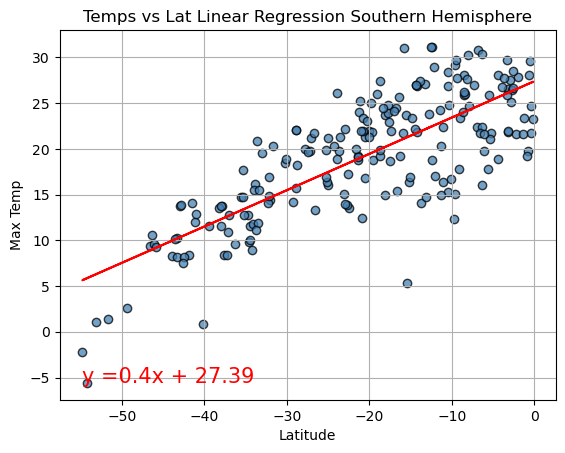

In [17]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Temps vs Lat Linear Regression Southern Hemisphere", "Latitude", "Max Temp", "../output_data/southern_hemi_df_MaxTemp_regression1.png")

Discussion about the linear relationship: Northern Hemisphere: The linear regression chart shows a slightly moderately positive correlation between temperature and latitude(r-value is 0.3934304679189785). Southern Hemisphere: The linear regression chart shows a moderate positive correlation between temperature and latitude(r-value is: 0.5826999917002821). This would lead to the conclusion that in the Northern Hemisphere, there is a slight tendency for temperature to decrease with increasing latitude, while in the Southern Hemisphere, there is a moderate tendency for temperature to increase as we move closer to the equator. Causes may be attributed to by variations in climate conditions, geographical features, and variance in the atmospheric environment.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0090775383652665


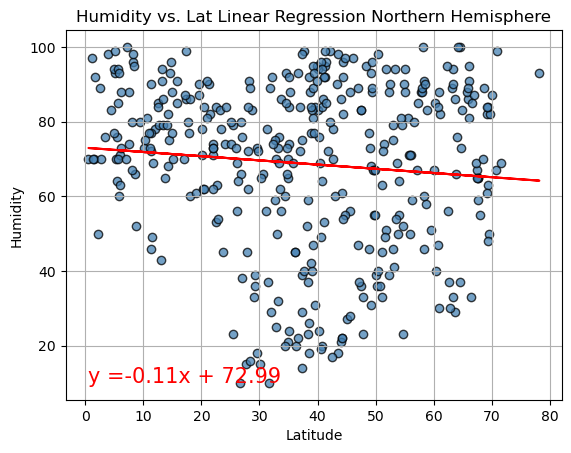

In [18]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity vs. Lat Linear Regression Northern Hemisphere", "Latitude", "Humidity", "../output_data/N_Hemisphere_Hum_regression1.png")

The r-value is: 0.0059045359238004


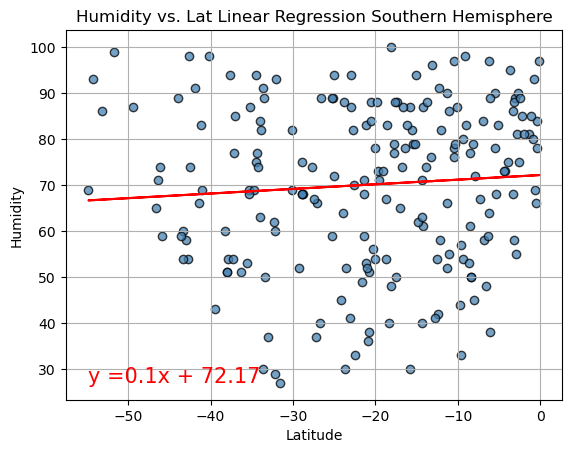

In [19]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Humidity vs. Lat Linear Regression Southern Hemisphere", "Latitude", "Humidity", "../output_data/S_Hemisphere_Hum_regression1.png")

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0035546953143227


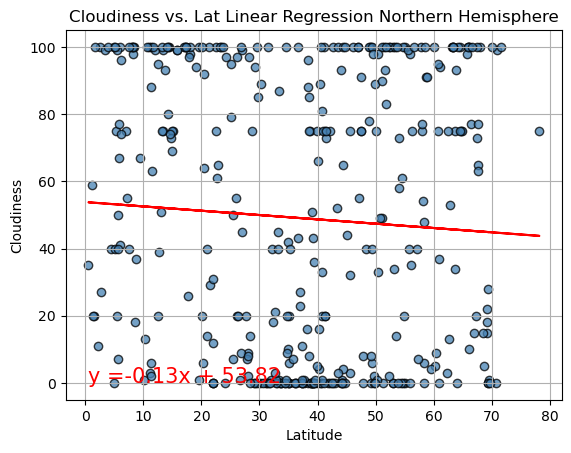

In [20]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Cloudiness vs. Lat Linear Regression Northern Hemisphere", "Latitude", "Cloudiness", "../output_data/N_Hemisphere_Cloud_regression1.png")

The r-value is: 0.0206310919542956


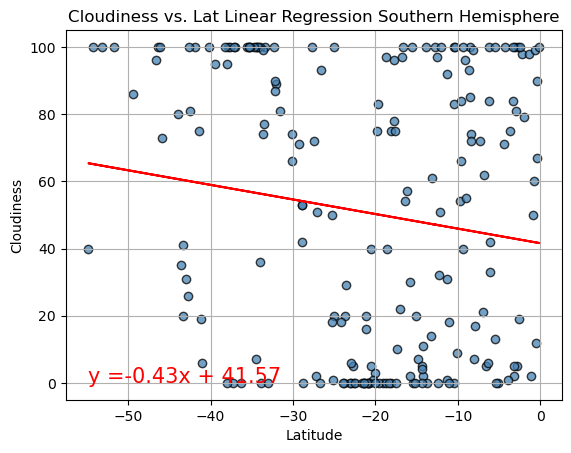

In [21]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Cloudiness vs. Lat Linear Regression Southern Hemisphere", "Latitude", "Cloudiness", "../output_data/S_Hemisphere_Cloud_regression1.png")

Discussion about the linear relationship: Northern Hemisphere: Northern Hemisphere: There is almost no negative correlation between cloudiness and latitude(r-value is: 0.0035546953143227). Southern Hemisphere: Also displays almost no correlation between cloudiness and latitude(r-value is: 0.0206310919542956). This leads me to believe that there are other factors affecting the level of cloudiness, which is not influenced by the latitude of the location.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0006924673415230


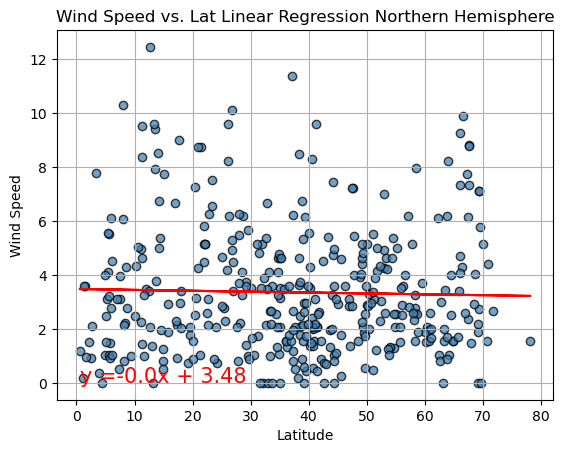

In [22]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Wind Speed vs. Lat Linear Regression Northern Hemisphere", "Latitude", "Wind Speed", "../output_data/N_Hemisphere_WS_regression1.png")

The r-value is: 0.0001388819475676


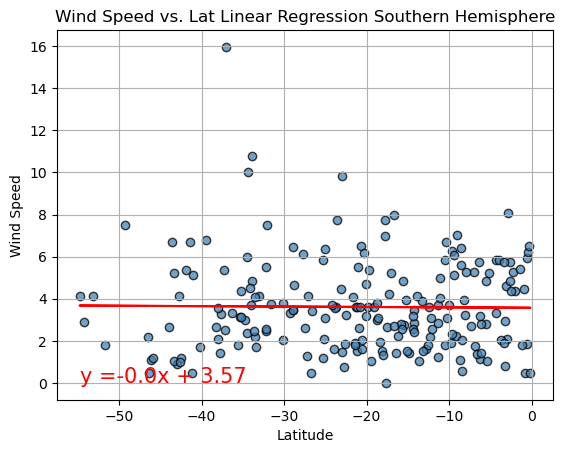

In [23]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Wind Speed vs. Lat Linear Regression Southern Hemisphere", "Latitude", "Wind Speed", "../output_data/S_Hemisphere_WS_regression1.png")

Discussion about the linear relationship: The datapoints for random cities in both models do not show any linear pattern between the latitude and wind speed for either hemisphere with the r values being very low at 0.005054896600921634 for the Northern Hemisphere and an r value of 0.0070921924681525 for the Southern Hemisphere.